# <center> Raport - symulacje komputerowe</center>
Adrian Stasiak 275991\
Jan Zawadzki 267878\
Krzysztof Bachanek 276050 [Symulacje komputerowe / grupa nr 3, poniedziałek 11:15, prowadzący: mgr inż. Kacper Taźbierski]

# Zadanie 1

In [40]:
import random
import timeit

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

mpl.rcParams['figure.dpi'] = 125

## Generator ACORN

In [17]:
def ACORN(N, k, M, Lag):
    """
    Generuje ciąg liczb pseudolosowych z rozkładu jednostajnego U(0, 1) przy użyciu generatora ACORN (Additive Congruential Random Number).
    
    Parametry:
    N (int): Liczba liczb pseudolosowych do wygenerowania.
    k (int): Rząd generatora ACORN.
    M (int): Dostatecznie duża liczba naturalna, względnie pierwsza z ziarnem (seed).
    Lag (int): Liczba pominiętych pierwszych wygenerowanych wyrazów ciągu. 
    
    Zwraca:
    list: Listę liczb pseudolosowych o rozmiarze N.

    Przykładowe użycie:

    >>> ACORN(5, 9, 2**89 - 1, 2)
    [0.5509401693373968, 0.4236316958252297, 0.9821841169921995, 0.7290280293056313, 0.29467087615235504]
    >>>
    """
    
    # Zwiększenie N o liczbę pominiętych wyrazów
    N += Lag
    
    # Ustawienie ziarna generatora ACORN
    seed = 299
    
    random.seed()
    
    # Wygenerowanie początkowego wektora liczb całkowitych z przedziału [0 , M) 
    X_k_n = [random.randint(0, M) for _ in range(k + 1)]
    
    # Ustawienie ziarna jako pierwszego elementu wektora X_k_n
    X_k_n[0] = seed
    
    Y_k_n = [0 for _ in range(N)]
    
    # Generowanie liczb pseudolosowych
    for i in range(N):
        for j in range(1, k + 1):
            X_k_n[j] = (X_k_n[j] + X_k_n[j - 1]) % M 
        
        Y_k_n[i] = X_k_n[k] / M
    
    return Y_k_n[Lag:]

## Wykresy

Przykładowe parametry dla symulacji

In [1]:
k = 9
M = 2**89 - 1
Lag = 10**3

### Dla N = 1000

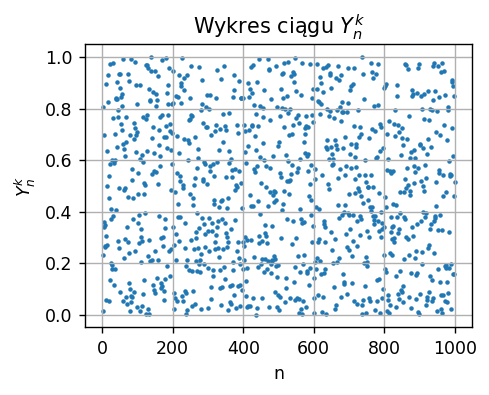

In [172]:
N = 1000

sample = ACORN(N, k, M, Lag)

plt.figure(figsize=(4,3))
plt.scatter(range(1, N+1), sample, marker='.', s=10)
plt.xlabel('n')
plt.ylabel('$Y_{n}^{k}$')
plt.title('Wykres ciągu $Y_{n}^{k}$')
plt.grid('True')
plt.show()

Z powyższego wykresu wynika, że wygenerowana przy pomocy generatora ACORN próbka, może spełniać cechy ciągu IID zmiennych losowych z rozkładu jednostajnego $U(0, 1)$.

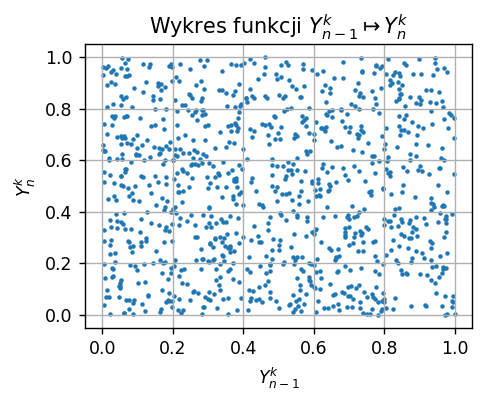

In [173]:
plt.figure(figsize=(4,3))
plt.scatter(sample[: N - 1], sample[1:], marker=".", s=10)
plt.xlabel('$Y_{n-1}^{k}$')
plt.ylabel('$Y_{n}^{k}$')
plt.title('Wykres funkcji $Y_{n-1}^{k} \mapsto Y_{n}^{k} $')
plt.grid('True')
plt.show()

Wykres nie ujawnia zależności między poprzednim, a następnym wyrazem ciągu.

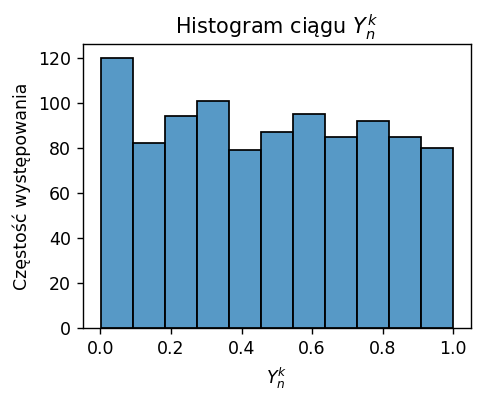

In [174]:
plt.figure(figsize=(4,3))
sns.histplot(sample)
plt.ylabel('Częstość występowania')
plt.xlabel('$Y_{n}^{k}$')
plt.title('Histogram ciągu $Y_{n}^{k}$')
plt.show()

Przy wyegenrowanej próbce, częstość występowania poszczególnych liczb z danego przedziału jest podobna.

### Dla N = 10000

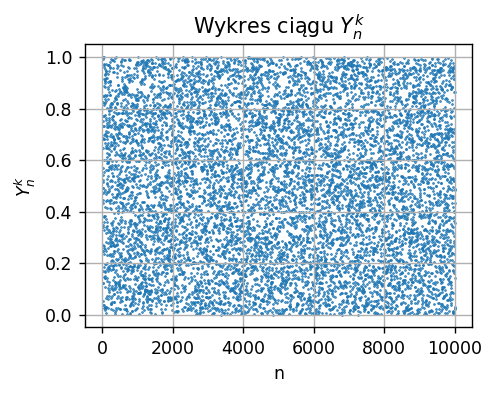

In [175]:
N = 10000

sample = ACORN(N, k, M, Lag)

plt.figure(figsize=(4,3))
plt.scatter(range(1, N+1), sample, marker='.', s=1)
plt.xlabel('n')
plt.ylabel('$Y_{n}^{k}$')
plt.title('Wykres ciągu $Y_{n}^{k}$')
plt.grid('True')
plt.show()

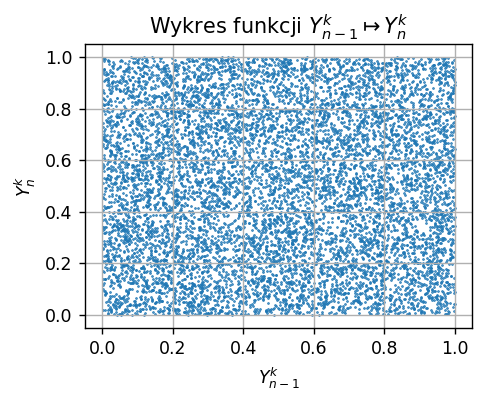

In [176]:
plt.figure(figsize=(4,3))
plt.scatter(sample[0: N - 1], sample[1:], marker='.', s=1)
plt.xlabel('$Y_{n-1}^{k}$')
plt.ylabel('$Y_{n}^{k}$')
plt.title('Wykres funkcji $Y_{n-1}^{k} \mapsto Y_{n}^{k} $')
plt.grid('True')
plt.show()

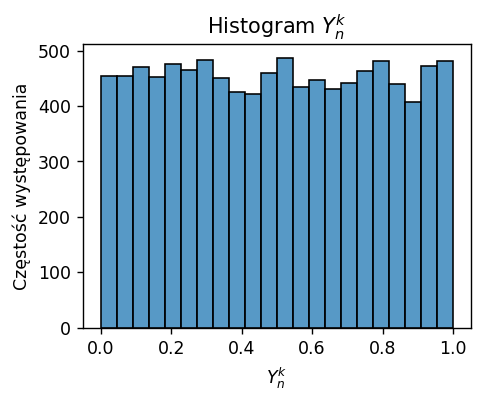

In [177]:
plt.figure(figsize=(4,3))
sns.histplot(sample)
plt.ylabel('Częstość występowania')
plt.xlabel('$Y_{n}^{k}$')
plt.title('Histogram $Y_{n}^{k}$')
plt.show()

Przy wygenerowanej większej próbce zaobserowano uwydatnione cechy rozkładu jednostajnego.

Przeprowadzone symulacje wskazują, że generator ACORN może spełniać pożądane cechy generatora liczb pseudolosowych, a wygenerowane próbki przypominają ciąg IID zmiennych losowych z rozkładu jednostajnego $U(0, 1)$.

## Porównanie wydajności z generatorem $\textit{numpy}$

In [102]:
code = """
k = 9
M = 2**89 - 1
Lag = 10**3
N = 10**6
ACORN(N, k, M, Lag)
"""

n = 100

sum_time = timeit.timeit(stmt=code, number=n, globals=globals())

average_time = sum_time / n

print(average_time)

1.3906141687099989


In [111]:
code = """
rng = np.random.default_rng(seed=299)
rng.random(10**6)
"""

n = 100

sum_time = timeit.timeit(stmt=code, number=n, globals=globals())

average_time = sum_time / n

print(average_time)

0.0033070585899986327


Porównano wydajność zaimplementowanego generatora ACORN z wbudowanym generatorem biblioteki $\textit{numpy}$ (PCG64). Mierzono czas wygenerowania próbki dla różnych wartości $N$. Średnie czasy wygenerowania ciągu liczb zaprezentowano w poniższej tabeli.

$$
\begin{aligned}
& \\
&\begin{array}{ccc}
\hline \hline \text { N } & \text { ACORN } & \text { PCG64 } \\
\hline 10^4 & 16 \; ms & 0,11 \; ms \\
10^5 & 145 \; ms & 0,40 \; ms \\
2 \cdot 10^5 & 280 \; ms & 0,70 \; ms \\
4 \cdot 10^5 & 570 \; ms & 1,33 \; ms \\
10^6 & 1,40 \; s & 3,30 \; ms \\
\hline
\end{array}
\end{aligned}
$$


Z powyższej danych wynika, że wbudowany generator Numpy (PCG64) jest średnio około 350 razy szybszy niż zaimplementowany generator ACORN.

# Zadanie 2

Czasy wykonywania algorytmów:
Metoda Boxa-Mullera: 0.00726628303527832 sekund
Metoda Marsagliego: 0.007276058197021484 sekund
Metoda zigguratu: 0.003694772720336914 sekund
Metoda tuzina: 0.0029916763305664062 sekund


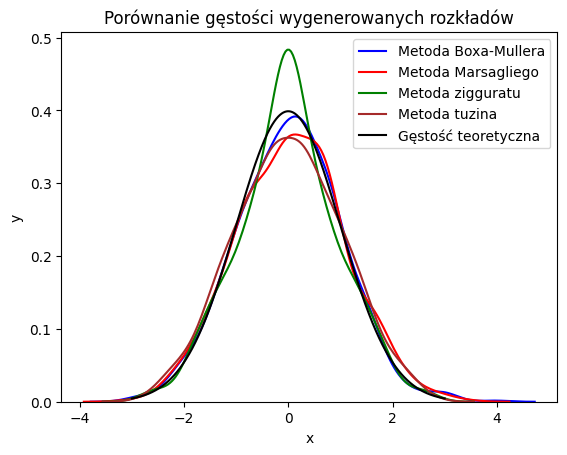

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def gęstość_rozkładu(x=0):
    """Wyznaczanie wartości gęstości rozkładu wykładniczego z parametrem lambda=1 dla danej wartości x.

    Argumenty:
    x -- argument funkcji (domyślnie 0)
    """
    return np.exp((-1) * x)


def metoda_boxa_mullera(mi=0, sigma=1, size=1):
    """Generowanie zmiennych z rozkładu normalnego metodą Boxa-Mullera.

    Argumenty:
    mi -- wartość oczekiwana (domyślnie 0)
    sigma -- odchylenie standardow (domyślnie 0)
    size -- ilość zmiennych do wygenerowania (domyślnie 1)
    """
    zmienne = np.zeros(size)  # zmienna przechowująca zmienne z rozkładu normalnego
    k = 0
    while k < size:
        u1, u2 = np.random.random(size=2)  # algorytm
        zmienne[k] = sigma * np.sqrt((-2) * np.log(u1)) * np.cos(2 * np.pi * u2) + mi
        k += 1
        if k < size:
            zmienne[k] = (
                sigma * np.sqrt((-2) * np.log(u1)) * np.sin(2 * np.pi * u2) + mi
            )
            k += 1
        else:
            break

    return zmienne


def metoda_marsagliego(mi=0, sigma=1, size=1):
    """Generowanie zmiennych z rozkładu normalnego metodą Marsagliego.

    Argumenty:
    mi -- wartość oczekiwana (domyślnie 0)
    sigma -- odchylenie standardow (domyślnie 0)
    size -- ilość zmiennych do wygenerowania (domyślnie 1)
    """
    zmienne = np.zeros(size)  # zmienna przechowująca zmienne z rozkładu normalnego
    k = 0
    while k < size:
        while True:  # algorytm
            v1, v2 = np.random.uniform(-1, 1, 2)
            r2 = v1**2 + v2**2
            if r2 < 1:
                break

        zmienne[k] = sigma * np.sqrt((-2) * np.log(r2) / r2) * v1 + mi
        k += 1
        if k < size:
            zmienne[k] = sigma * np.sqrt((-2) * np.log(r2) / r2) * v2 + mi
            k += 1
        else:
            break

    return zmienne


def metoda_zigguratu(mi=0, sigma=1, size=1):
    """Funkcja zwraca zmienne losowe z rozkładu normalnego o parametrach mi, sigma wygenerowane za pomocą metody zigguratu.

    Argumenty:
    mi -- wartość oczekiwana (domyślnie 0)
    sigma -- odchylenie standardow (domyślnie 0)
    size -- ilość zmiennych do wygenerowania (domyślnie 1)
    """
    n = 256  # ilość przedziałów, na które podzielono
    zmienne = np.zeros(size)  # zmienna przechowująca zmienne z rozkładu normalnego
    przedział_argumentów = np.linspace(0, 3, n)
    przedział_wartości = np.zeros(n)
    przedział_wartości[0] = 1
    k = 0
    while k < size:
        i = np.random.randint(0, n)
        x1 = przedział_argumentów[i]  # dolny brzeg wylosowanego przedziału
        x2 = (
            przedział_argumentów[i] + przedział_argumentów[1] - przedział_argumentów[0]
        )  # górny brzeg wylosowanego przedziału
        x = np.random.random() * x2  # x - kandydat na zmienną z rozkładu normalnego
        if (
            x < x1
        ):  # sprawdzamy, czy x jest mniejszy od dolnej granicy przedziału; jeśli tak, to jest zmienną z rozkładu normalnego
            zmienne[k] = x
            k += 1
            if (
                k < size
            ):  # wykorzystanie własności gęstości rozkładu normalnego (liczba symetryczna względem średniej również jest zmienną z rozkładu normalnego)
                zmienne[k] = (-1) * x
                k += 1
            else:
                break
        else:
            y1 = gęstość_rozkładu(
                x1
            )  # wyznaczanie wartości brzegowych zbioru wartości gęstości rozkładu normalnego(y1 > y2)
            y2 = gęstość_rozkładu(x2)
            y = y2 + np.random.random() * (y1 - y2)
            if y < gęstość_rozkładu(
                x
            ):  # sprawdzanie, czy x jest zmienną z rozkładu normalnego metodą akceptacji-odrzucenia
                zmienne[k] = x
                k += 1
                if (
                    k < size
                ):  # wykorzystanie własności gęstości rozkładu normalnego (liczba symetryczna względem średniej również jest zmienną z rozkładu normalnego)
                    zmienne[k] = (-1) * x
                    k += 1
                else:
                    break

    return sigma * zmienne + mi  # zwracanie wygenerowanych wartości


def metoda_tuzina(mi=0, sigma=1, size=1):
    """Funkcja zwraca zmienne losowe z rozkładu normalnego o parametrach mi, sigma wygenerowane za pomocą metody zigguratu.

    Argumenty:
    mi -- wartość oczekiwana (domyślnie 0)
    sigma -- odchylenie standardow (domyślnie 0)
    size -- ilość zmiennych do wygenerowania (domyślnie 1)
    """
    zmienne = np.zeros(
        size
    )  # zmienna przechowująca zmienne losowe z rozkładu normalnego
    i = 0  # iterator
    while i < size:  # algorytm generowania zmiennej losowej
        u = np.random.random(size=12)
        tuzin = np.sum(u)
        x = tuzin - 6
        zmienne[i] = sigma * x + mi
        i += 1
        if (
            i < size
        ):  # wykorzystanie własności gęstości rozkładu normalnego (liczba symetryczna względem średniej również jest zmienną z rozkładu normalnego)
            zmienne[i] = (-1) * (zmienne[i - 1] - mi) + mi
            i += 1
    return zmienne  # zwracanie wygenerowanych zmiennych losowych


if __name__ == "__main__":
    """Właściwa część programu."""
    czasy_wykonywania = np.zeros(
        4
    )  # zmienna przechowująca czasy wykonywania algorytmów
    średnia = 0
    odchylenie = 1
    xs = np.linspace((-3) * odchylenie + średnia, 3 * odchylenie + średnia, 10000)

    początek = (
        time.time()
    )  # wykonywanie algorytmów oraz mierzenie czasu ich wykonywania
    box_muller = metoda_boxa_mullera(mi=średnia, sigma=odchylenie, size=1000)
    czasy_wykonywania[0] = time.time() - początek

    początek = time.time()
    marsaglii = metoda_marsagliego(mi=średnia, sigma=odchylenie, size=1000)
    czasy_wykonywania[1] = time.time() - początek

    początek = time.time()
    ziggurat = metoda_zigguratu(mi=średnia, sigma=odchylenie, size=1000)
    czasy_wykonywania[2] = time.time() - początek

    początek = time.time()
    tuzin = metoda_tuzina(mi=średnia, sigma=odchylenie, size=1000)
    czasy_wykonywania[3] = time.time() - początek

    print("Czasy wykonywania algorytmów:")  # wypisywanie czasów wykonywania algorytmów
    print(f"Metoda Boxa-Mullera: {czasy_wykonywania[0]} sekund")
    print(f"Metoda Marsagliego: {czasy_wykonywania[1]} sekund")
    print(f"Metoda zigguratu: {czasy_wykonywania[2]} sekund")
    print(f"Metoda tuzina: {czasy_wykonywania[3]} sekund")

    sns.kdeplot(
        box_muller, color="blue", label="Metoda Boxa-Mullera"
    )  # rysowanie gęstości empirycznych oraz teoretycznej
    sns.kdeplot(marsaglii, color="red", label="Metoda Marsagliego")
    sns.kdeplot(ziggurat, color="green", label="Metoda zigguratu")
    sns.kdeplot(tuzin, color="brown", label="Metoda tuzina")
    plt.plot(
        xs,
        np.exp((-1) * ((xs - średnia) ** 2) / (2 * odchylenie**2))
        / ((odchylenie**2) * np.sqrt(2 * np.pi)),
        color="black",
        label="Gęstość teoretyczna",
    )
    plt.title("Porównanie gęstości wygenerowanych rozkładów")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()


Na podstawie uzyskanych wyników można stwierdzić, że najszybszym algorytmem generowania rozkładu normalnego jest Metoda Tuzina. Metoda Zigguratu jest niewiele wolniejsza, natomiast algorytmny poznane na wykładzie są dużo wolniejsze.
W przypadku efektów algorytmów to gęstości wszystkich algorytmów lekko odbiegają od wartości teoretycznej w okolicach średniej, a dla pozostałych wartości x przyjmują wartości zbliżone do wartości teoretycznych.

# Zadanie 3

## Krok 1: Obliczanie całki
Mamy całkę
\begin{equation}
\int\limits_{0}^{1}\frac{4}{1+x^2}\operatorname{d}x
\end{equation}
Całkę tę mamy obliczyć metodą Monte Carlo. Z obliczeń analitycznych wiemy, że wartość tej całki jest równa $\pi$. Wyniki symulacji powinny zatem zwracać wartości oscylujące wokół $3.14$.

In [7]:
# importujemy biblioteki 
import random 
import numpy as np 

# ustawiamy granice całkowania
lim_down = 0
lim_up = 1
N = 10000
  
# tworzymy listę zer o długości N
helpful_list = np.zeros(N) 

# iterujemy po wszystkich wartościach listy
# helpful_list i zamieniamy zera na losową wartość
# z zakresu (lim_down, lim_up)
for i in range (len(helpful_list)): 
    helpful_list[i] = random.uniform(lim_down, lim_up) 

# zmienna, które będzie przechowywać
# sumy funkcji
integral = 0.0
  
# funkcja do obliczania całki 
def f(x): 
    return (4/(1+(x**2)))
  
# iterujemy i dodajemy do zmiennej
# integral wartości z funkcji f(x)
for i in helpful_list: 
    integral += f(i) 
  
# answer - wyliczona wartość całki
answer = (lim_up-lim_down)/float(N)*integral 
  
# prints the solution 
print (f'Wartość całki to {answer}') 


Wartość całki to 3.143521113014192


## Krok 2: Metoda redukcji wariancji
W tym kroku wykorzystamy metodę odbić lustrzanych do obliczenia tej samej całki, którą obliczyliśmy w Kroku 1.

In [6]:
# importujemy potrzebne biblioteki
import numpy as np
import matplotlib.pyplot as plt

# funkcja, którą będziemy 
# całkować
def f(x):
    return 4 / (1 + x**2)

N = 10000

# funkcja do obliczania całki
# metodą odbić lustrzanych
def odbicia_lustrzane(N):
    u = np.random.uniform(0, 1, int(N/2))
    u_lustrzane = 1 - u
    integral_lustrzane = (f(u) + f(u_lustrzane)) / 2
    return np.mean(integral_lustrzane)
print(f'Wartość całki to {odbicia_lustrzane(N)}')

Wartość całki to 3.1423065810507826


## Krok 3: Analiza błędu
Oczywistym jest, że symulacyjne obliczanie całki obarczone jest błędem, większym bądź mniejszym. W tym kroku porównamy błąd, który towarzyszy obliczaniu całki metodą odbić lustrzanych z rzeczywistą (choć mocno przybliżoną) wartością liczby $\pi$.

Liczba symulacji = 10; Szacowana wartość = 3.175988179019923; Błąd = 0.034395525430130025
Liczba symulacji = 100; Szacowana wartość = 3.1367756471588457; Błąd = 0.0048170064309474014
Liczba symulacji = 1000; Szacowana wartość = 3.13972039656005; Błąd = 0.0018722570297429186
Liczba symulacji = 10000; Szacowana wartość = 3.1412887360262483; Błąd = 0.0003039175635448643
Liczba symulacji = 100000; Szacowana wartość = 3.1414431118560415; Błąd = 0.0001495417337515903
Liczba symulacji = 1000000; Szacowana wartość = 3.141586763234251; Błąd = 5.890355541993131e-06


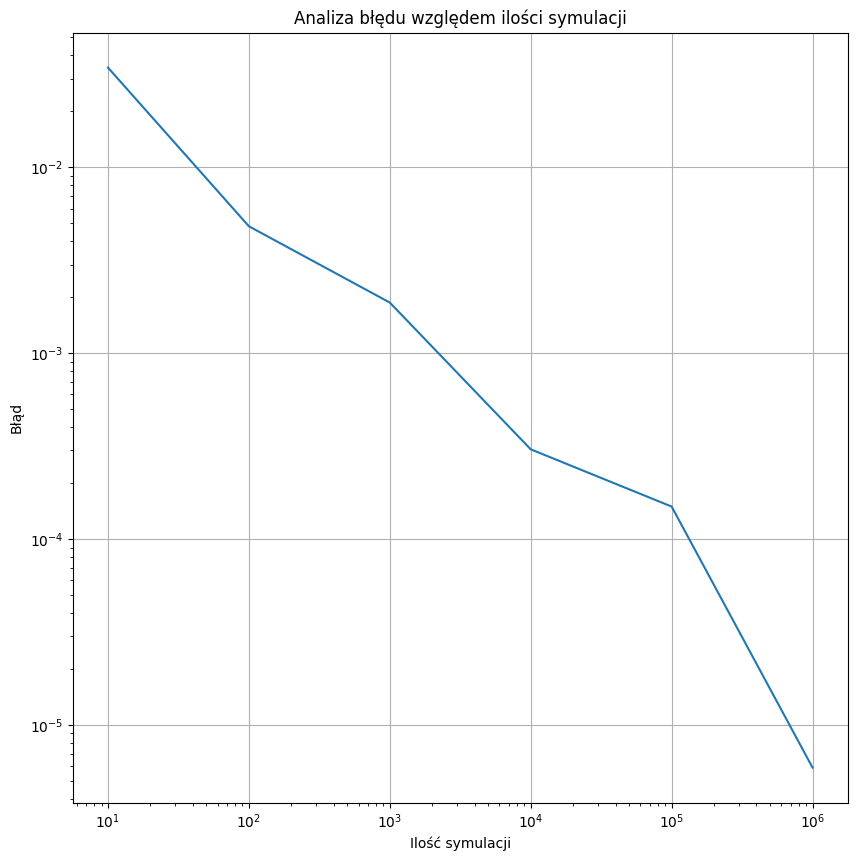

In [2]:
# importujemy potrzebne biblioteki
import numpy as np
import matplotlib.pyplot as plt

# funkcja, którą będziemy 
# całkować
def f(x):
    return 4 / (1 + x**2)

N = 10000

# funkcja do obliczania całki
# metodą odbić lustrzanych
def odbicia_lustrzane(N):
    u = np.random.uniform(0, 1, int(N/2))
    u_lustrzane = 1 - u
    integral_lustrzane = (f(u) + f(u_lustrzane)) / 2
    return np.mean(integral_lustrzane)

# rzeczywista wartość pi (oraz
# prawdziwa wartość całki)
prawdziwe_pi = np.pi  
symulacje = np.logspace(1, 6, num=6, dtype=int)

# pusta lista, którą będziemy
# uzupełniać wartościami błędów
lista_bledow = []

for N in symulacje:
    szacowanie = odbicia_lustrzane(N)
    # obliczamy błąd bezwzględny, żeby sprawdzić
    # jaka jest "odległość" między rzeczywistą wartością
    # pi a tą wyliczoną numerycznie
    blad = np.abs(szacowanie - prawdziwe_pi)
    lista_bledow.append(blad)
    print(f"Liczba symulacji = {N}; Szacowana wartość = {szacowanie}; Błąd = {blad}")

# tworzymy wykres
plt.figure(figsize=(10, 10))
plt.loglog(symulacje, lista_bledow)
plt.xlabel('Ilość symulacji')
plt.ylabel('Błąd')
plt.title('Analiza błędu względem ilości symulacji')
plt.grid()
plt.show()

Widzimy, że wraz ze wzrostem ilości symulacji maleje błąd bezwzględny, czyli numerycznie obliczana wartość całki jest coraz dokładniejsza.

# Zadanie 4
W tym zadaniu mamy symulacyjnie sprawdzić $3$ twierdzenia:

* Jeśli $X$ i $Y$ są zmiennymi losowymi niezależnymi, a $\mathbb{E}\left(Y\right) = 0$, to dla $Z = XY + \sin(X)$ zachodzi $\mathbb{E}\left(Z|X\right) = \sin(X)$.
* Gdy $N$ jest procesem Poissona o intensywności $\lambda$, to dla $T \geq t \geq 0$ zachodzi $\mathbb{E}(N_{t}|N_{T})$.
* Gdy $N$ jest procesem Poissona o intensywności $\lambda$, to dla $t \geq s \geq 0$ zachodzi $\mathbb{E}(N_{t}|\mathcal{F}_{s}) = N_{s} + \lambda (t-s)$, gdzie $\mathcal{F}_{s}$ to filtracja naturalna procesu $N_{s}$.

## Twierdzenie 1
Weźmiemy dwie zmienne losowe niezależne, obie z rozkładu $\mathcal{N}(0,1)$. Następnie zdefiniujemy nową zmienną losową $Z = XY + \sin(X)$ i przy pomocy scatterplota sprawdzimy, czy twierdzenie jest prawdziwe.

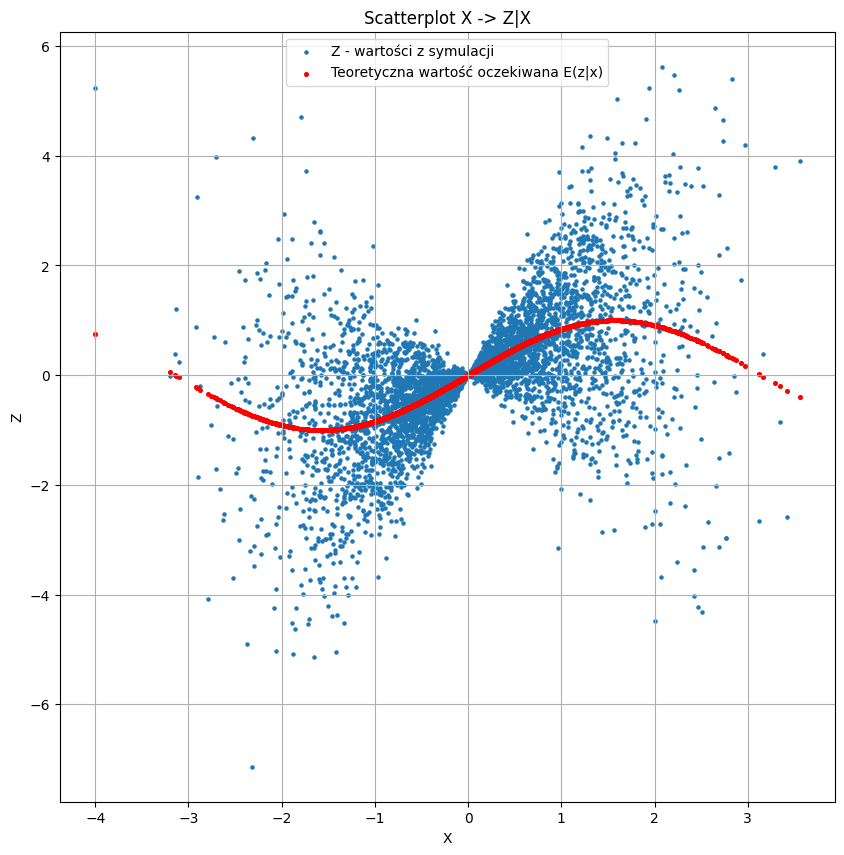

In [5]:
# importujemy biblioteki, które się przydadzą
import numpy as np
import matplotlib.pyplot as plt

# ilosc - ile razy symulujemy
ilosc = 5000

# generujemy zmienne losowe x i y z rozkładu normalnego N(0,1)
x = np.random.normal(0, 1, ilosc)
y = np.random.normal(0, 1, ilosc)

# Wstawiamy Z = XY + sin(X)
z = x * y + np.sin(x)

# wstawiamy teoretyczną wartość oczekiwaną E(z|x)
ezx = np.sin(x)

# tworzymy wykres
plt.figure(figsize=(10, 10))
plt.scatter(x, z, s = 5, label='Z - wartości z symulacji')
plt.scatter(x, ezx, color='red', s=7, label='Teoretyczna wartość oczekiwana E(z|x)')
plt.title('Scatterplot X -> Z|X')
plt.xlabel('X')
plt.ylabel('Z')
plt.legend(loc = 'upper center')
plt.grid()
plt.show()

Widzimy, że symulowane wartości zmiennej losowej $Z$ są chaotycznie rozłożone i ,,mniej więcej'' zgadzają się z teoretyczną wartością oczekiwaną $\mathbb{E}\left(Z|X\right) = \sin(X)$ tylko w okolicach punku $(0,0)$. Z powodu tak dużej rozbieżności możemy oznajmić, że analizowane twierdzenie jest fałszywe.


## Twierdzenie 2
W tym podpunkcie weźmiemy $T = 1$ oraz $\lambda = 10$. Następnie, w celu weryfikacji prawdziwości twierdzenie, stworzymy kilka wykresów - jeśli trajektorie symulowane i teoretyczne będą się ,,plus minus'' zgadzać, oznacza to, że twierdzenie jest prawdziwe.

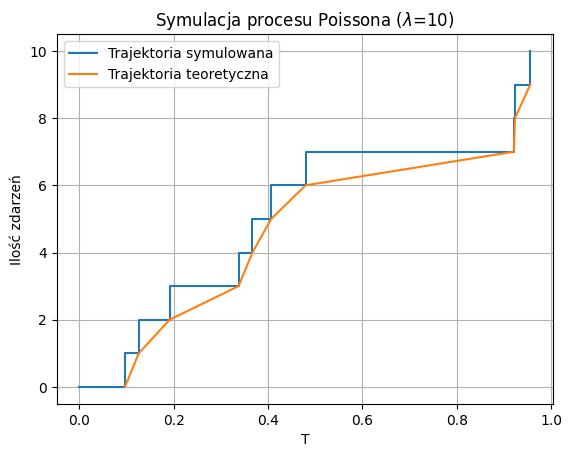

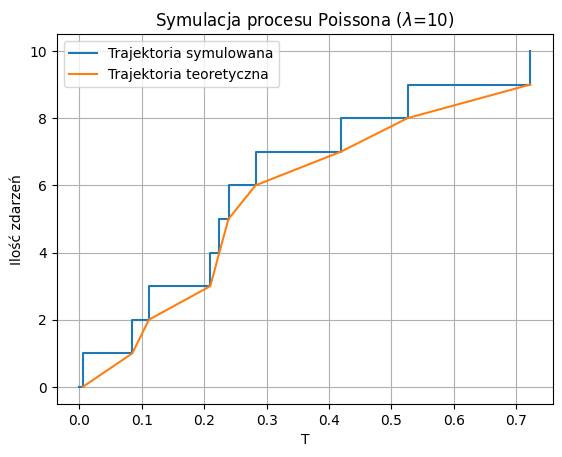

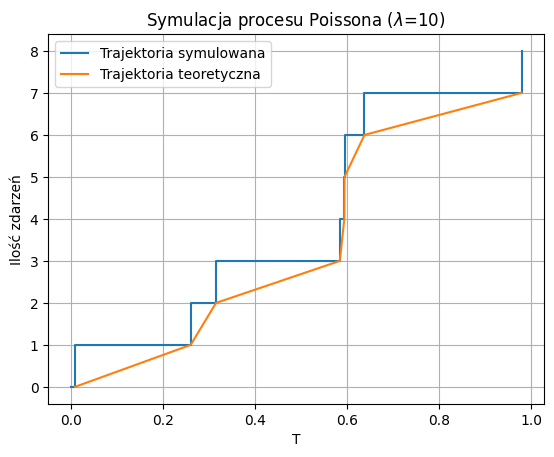

In [4]:
# importujemy biblioteki
import numpy as np
import matplotlib.pyplot as plt

# ustawiamy lambda (intensywność) 
# i T (czas)
lam = 10 
T = 1

def proces_poissona(lam, T):
    S = []
    czas = 0 # czas początkowy

    while czas < T:
        # nastepny_skok - czas do następnego zdarzenia
        nastepny_skok = np.random.exponential(1/lam)
        czas += nastepny_skok
        if czas < T:
            S.append(czas)
    return np.array(S)

# tworzymy 3 wykresy
for i in range(3):
    S = proces_poissona(lam, T)
    numerki = [event for event in range(0,len(S))]
    
    plt.step(np.concatenate([[0], S]), np.arange(len(S) + 1), where='post')
    plt.plot(S, numerki)
    plt.xlabel('T')
    plt.ylabel('Ilość zdarzeń')
    plt.title(f'Symulacja procesu Poissona ($\lambda$={lam})')
    plt.legend(["Trajektoria symulowana","Trajektoria teoretyczna"], loc = 'upper left')
    plt.grid()
    plt.show()

Widzimy, że trajektorie ,,mniej więcej'' się pokrywają, wobec czego twierdzenie jest prawdziwe. Trajektoria teoretyczna zawsze zaniża symulowaną wartość.

## Twierdzenie 3
Ten podpunkt jest dość podobny do poprzedniego - ponownie przybliżamy wartości zwracane przez proces Poissona pewną wartością oczekiwaną. Tym razem wzór prezentuje się nieco inaczej: $\mathbb{E}(N_{t}|\mathcal{F}_{s}) = N_{s} + \lambda (t-s)$. Przyjmiemy $s = 1$ oraz $\lambda = 10$. 

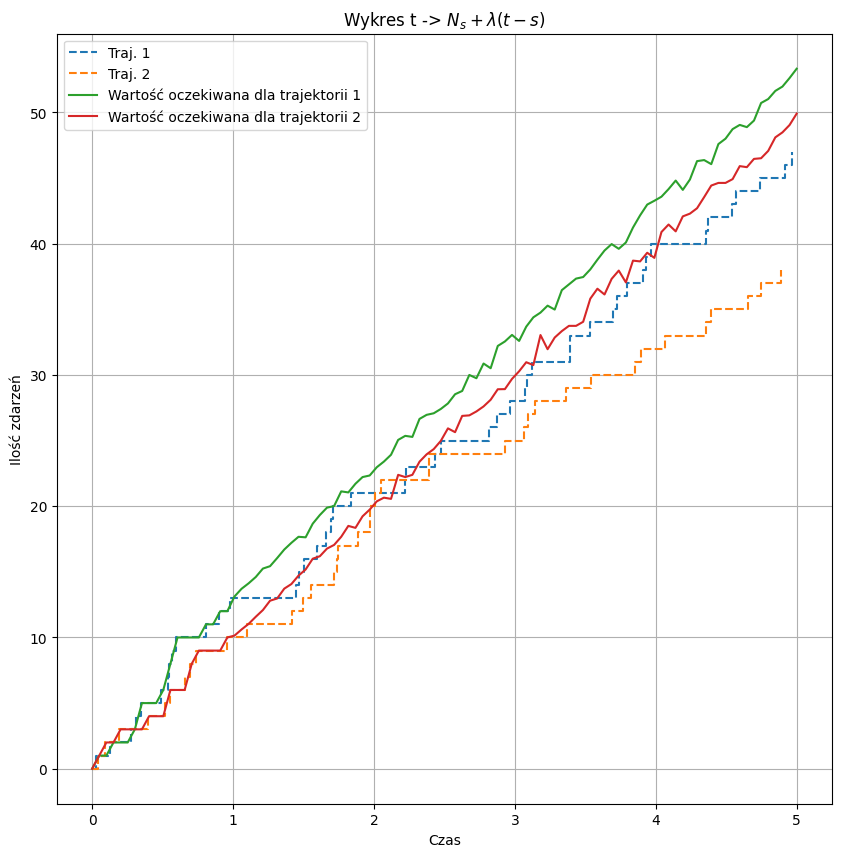

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def proces_poissona(lam, czas_symulacji, liczba_trajektorii):
    trajektorie = []
    
    for k in range(liczba_trajektorii):
        czasy_zdarzen = []
        czas_teraz = 0

        while czas_teraz < czas_symulacji:
            skok = np.random.exponential(1 / lam)
            czas_teraz += skok
            if czas_teraz < czas_symulacji:
                czasy_zdarzen.append(czas_teraz)

        trajektorie.append(np.array(czasy_zdarzen))
    
    return trajektorie

def events(trajektoria, czas):
    return np.sum(trajektoria <= czas)

# lam - intensywność
lam = 10
# s - chwila zdefioniowana w treści zadania
s = 1
# ustalamy t_max = 5
t_max = 5
liczba_trajektorii = 100
czasy = np.linspace(0, t_max, 100)

# symulujemy proces Poissona do t_max
trajektorie = proces_poissona(lam, t_max, liczba_trajektorii)

# wybieramy dwie trajektorie, które przedstawimy
# na wykresie
wybrane_trajektorie = trajektorie[:2]

# wyniki - lista, w której będą zbierane 
# wyniki dla trajektorii
wyniki = []

for trajektoria in wybrane_trajektorie:
    N_s = events(trajektoria, s)
    srednie = []
    
    for t in czasy:
        if t <= s:
            srednie.append(events(trajektoria, t))
        else:
            nowe_trajektorie = []
            
            for _ in range(liczba_trajektorii):
                czasy_zdarzen = []
                czas_teraz = s

                while czas_teraz < t:
                    skok = np.random.exponential(1 / lam)
                    czas_teraz += skok
                    if czas_teraz < t:
                        czasy_zdarzen.append(czas_teraz)

                nowe_trajektorie.append(np.array(czasy_zdarzen))
            
            # liczymy średnią ilość zdarzeń dla nowych trajektorii
            liczba_zdarzen = [N_s + events(trajektoria, t) 
                              - events(trajektoria, s) for 
                              trajektoria in nowe_trajektorie]
            srednie.append(np.mean(liczba_zdarzen))
    
    wyniki.append(srednie)

plt.figure(figsize=(10, 10))

# rysujemy trajektorie
for j, trajektoria in enumerate(wybrane_trajektorie):
    czasy_zdarzen = np.concatenate([[0], 
                        trajektoria[trajektoria <= t_max]])
    liczby_zdarzen = np.arange(len(czasy_zdarzen))
    plt.step(czasy_zdarzen, liczby_zdarzen, where='post', 
             label=f'Traj. {j + 1}', linestyle='--')

# rysujemy wartości oczekiwane
for j, srednie in enumerate(wyniki):
    plt.plot(czasy, srednie, label=f'Wartość oczekiwana dla trajektorii {j + 1}')

# tworzymy wykres
plt.xlabel('Czas')
plt.ylabel('Ilość zdarzeń')
plt.title('Wykres t -> $N_{s} + \lambda (t-s)$')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

Z wykresu możemy odczytać, że trajketorie procesu Poissona oraz wyliczane wartości oczekiwane nie pokrywają się idealnie, jednak nie dochodzi też do chaotycznego ,,rozjeżdżania się''. Oznacza to, że wyliczane wartości oczekiwane nie oddają w stu procentach wartości procesu Poissona w danej chwili. Mimo to owe wartości oczekiwane w stopniu zadowalającym mogą dać nam oszacowanie wartości w chwili $t$.

# Zadanie 5

In [117]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import lambertw

mpl.rcParams['figure.dpi'] = 125

## Wzór Pollaczka-Chinczyna

In [127]:
def psi(u, c, lambd, eta):
    """
    Oblicza prawdopodobieństwo ruiny w nieskończonym czasie korzystając ze wzoru Pollaczka-Chinczyna.
    
    Parametry:
    u (int/float): Kapitał początkowy.
    c (int/float): Wartość wpłat (przychody firmy ze sprzedaży polis).
    lambd (int/float): Intensywność procesu liczącego szkody (procesu Poissona).
    eta (int/float): Parametr zmiennej losowej z rozkładu wykładniczego (średnia wysokość wypłaty odszkodowania).
    
    Zwraca:
    float: Prawdopodobieństwo ruiny w nieskończonym czasie.

    Przykładowe użycie:

    >>> psi(5, 1.2, 1, 1)
    0.36216517375589863
    >>>
    """
    return ((eta * lambd) / c) * np.exp(-((1 / eta) - (lambd / c)) * u)

## Wzór funkcji odwrotnej

In [119]:
def c(u, p, lambd, eta):
    """
    Oblicza wymaganą wartość wpłat przy danym kapitale początkowym w celu osiągnięcia wymaganego prawdopodobieństwa ruiny.
    
    Parametry:
    u (int/float): Kapitał początkowy.
    p (float): Wymagane prawdopodobieństwo ruiny.
    lambd (int/float): Intensywność procesu liczącego szkody (procesu Poissona).
    eta (int/float): Parametr zmiennej losowej z rozkładu wykładniczego (średnia wysokość wypłaty odszkodowania).
    
    Zwraca:
    float: Wymagana wartość wpłat.

    Przykładowe użycie:

    >>> c(5, 0.25, 1, 1)
    1.2920191007528934
    >>>
    """
    return np.real((lambd * u) / (lambertw((u * p * np.exp(u / eta)) / eta)))


## Proces ruiny modelu Craméra-Lundberga

In [129]:
def X(T, u, c, lambd, eta):
    """
    Symuluje proces ruiny Craméra-Lundberga w zadanym horyzoncie czasowym T.
    
    Parametry:
    T (int/float): Horyzont czasowy symulacji.
    u (int/float): Kapitał początkowy.
    c (int/float): Wartość wpłat (przychody firmy ze sprzedaży polis).
    lambd (int/float): Intensywność procesu liczącego szkody (procesu Poissona).
    eta (int/float): Parametr zmiennej losowej z rozkładu wykładniczego (średnia wysokość wypłaty odszkodowania).
    
    Zwraca:
    int: 1, jeśli nastąpi ruina w czasie T, w przeciwnym razie 0.

    Przykładowe użycie:

    >>> X(5, 2, 1, 1, 1)
    1
    >>>
    """

    time = 0
    X = u
    
    while time <= T:
        # Czas do wystąpienia następnej szkody
        t = np.random.exponential(lambd)
        
        # Wysokość wypłaty następnego odszkodowania
        amount_of_compensation_payment = np.random.exponential(eta)
        
        # Przychody firmy do czasu wystąpienia następnej szkody
        company_profit = c * t
        
        # Aktualizacja kapitału
        X += company_profit - amount_of_compensation_payment
        
        # Sprawdzenie czy nie nastąpiła ruina
        if X <= 0:
            return 1
        
        # Aktualizacja czasu
        time += t
    
    return 0

## Funkcje symulacyjne

In [145]:
def finite_time_ruin_prob(MC, T, u, c, lambd, eta):
    """
    Estymuje prawdopodobieństwo ruiny w skończonym horyzoncie czasowym za pomocą symulacji Monte Carlo.
    
    Parametry:
    MC (int): Liczba symulacji Monte Carlo.
    T (int/float): Horyzont czasowy każdej symulacji.
    u (int/float): Kapitał początkowy.
    c (int/float): Wartość wpłat (przychody firmy ze sprzedaży polis).
    lambd (int/float): Intensywność procesu liczącego szkody (procesu Poissona).
    eta (int/float): Parametr zmiennej losowej z rozkładu wykładniczego (średnia wysokość wypłaty odszkodowania).
    
    Zwraca:
    float: Wyestymowane prawdopodobieństwo ruiny w horyzoncie czasowym T.

    Przykładowe użycie:

    >>> finite_time_ruin_prob(10**4, 50, 5, 2, 1, 1)
    0.0424
    >>>
    """

    # Licznik wystąpień ruiny w skończonym czasie
    count = 0

    for _ in range(MC):

        # Generowanie pojedyńczego procesu ruiny
        count += X(T, u, c, lambd, eta)

    # Wyestymowane prawdopodobieństwo to iloraz liczby wystąpień ruiny i liczby symulacji
    probability = count / MC
    
    return probability

def required_payments_value_simulation(MC, T, u, p, lambd, eta):
    """
    Estymuje wymaganą wartość wpłat, w celu osiągnięcia określonego prawdopodobieństwa ruiny w skończonym horyzoncie czasowym za pomocą metody bisekcji.
    
    Parametry:
    MC (int): Liczba symulacji Monte Carlo.
    T (int/float): Horyzont czasowy każdej symulacji.
    u (int/float): Kapitał początkowy.
    p (float): Wymagane prawdopodobieństwo ruiny.
    lambd (int/float): Intensywność procesu liczącego szkody (procesu Poissona).
    eta (int/float): Parametr zmiennej losowej z rozkładu wykładniczego (średnia wysokość wypłaty odszkodowania).
    
    Zwraca:
    float: Wymagana wartość wpłat, w celu osiągnięcia określonego prawdopodobieństwa ruiny.

    Przykładowe użycie:

    >>> required_payments_value_simulation(10**3, 50, 5, 0.25, 1, 1)
    1.2836318016052246
    >>>
    """
    # Epsilon określa dokładność wyniku wyestymowanego prawdopodobieństwa ruiny w skończonym czasie
    eps = 0.0002

    # Określenie przedziału szukanej wartości wpłat
    # Zauważmy, że dla c <= lambd*eta prawdopodobieństwo ruiny wynosi 1
    a = lambd * eta
    b = 10 * lambd * eta

    # Licznik podziałów metody bisekcji
    counter = 0
    
    while True:
        c = (a + b) / 2
        # Wyestymowane prawdopodobieństwo ruiny w skończonym czasie
        probability = finite_time_ruin_prob(MC, T, u, c, lambd, eta)
        
        # Jeśli uzyskamy zadaną dokładność wyestymowanego prawdopodobieństwa ruiny, zwracamy znalezioą wartość wpłat
        if np.abs(p - probability) < eps: 
            return c
        
        # Wybieranie nowego zakresu przedziału szukanej wartości wpłat
        if probability > p:
            a = c
        else:
            b = c

        counter += 1
        # Jeśli doszło do maksymalnej ustalonej liczby podziałów przedziału szukanej wartości wpłat, zwracamy znalezioą wartość wpłat
        if counter > 30:
            return c

## Symulacje, wykresy

### Dla funkcji $\psi = \psi(u,c)$

In [146]:
u_list = np.linspace(1, 10, 20)
psi_list_1_1 = [psi(u, 1.5, 1, 1) for u in u_list]
psi_list_1_2 = [psi(u, 1.75, 1, 1) for u in u_list]
psi_list_1_3 = [psi(u, 2, 1, 1) for u in u_list]
estimate_list_1_1 = [finite_time_ruin_prob(10**4, 50, u, 1.5, 1, 1) for u in u_list]
estimate_list_1_2 = [finite_time_ruin_prob(10**4, 50, u, 1.75, 1, 1) for u in u_list]
estimate_list_1_3 = [finite_time_ruin_prob(10**4, 50, u, 2, 1, 1) for u in u_list]

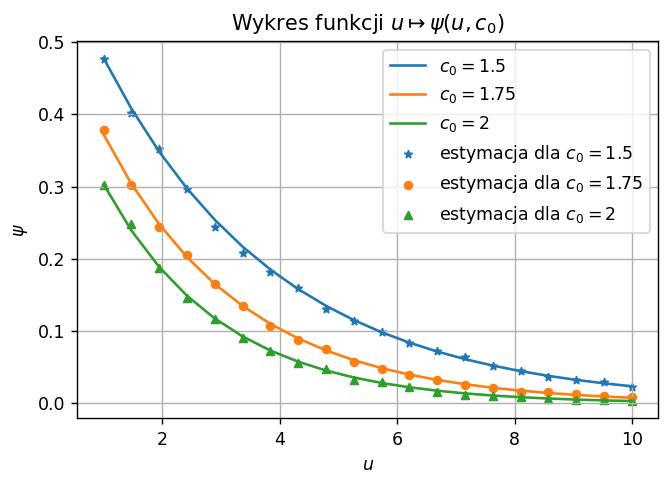

In [160]:
plt.plot(u_list, psi_list_1_1, label='$c_0 = 1.5$')
plt.plot(u_list, psi_list_1_2, label='$c_0 = 1.75$')
plt.plot(u_list, psi_list_1_3, label='$c_0 = 2$')
plt.scatter(u_list, estimate_list_1_1, label='estymacja dla $c_0 = 1.5$', marker='*', s=20)
plt.scatter(u_list, estimate_list_1_2, label='estymacja dla $c_0 = 1.75$', marker='o', s=20)
plt.scatter(u_list, estimate_list_1_3, label='estymacja dla $c_0 = 2$', marker='^', s=20)
plt.xlabel('$u$')
plt.ylabel('$\psi$')
plt.legend()
plt.title('Wykres funkcji $u \mapsto \psi(u, c_0)$')
plt.grid('True')
plt.show()

Na wykresie przedstawiono 3 trajektorie funkcji $u \mapsto \psi(u, c_0)$ dla ustalonych $c_0$. Wartości wyestymowane zaznaczono punktowo. Z przeprowadzonej symulacji wynika, że otrzymane wartości $\psi$ są bliskie z wartościami otrzymanymi ze wzoru Pollaczka-Chinczyna.

In [154]:
print(np.mean(np.abs(np.array(psi_list_1_1) - np.array(estimate_list_1_1))))
print(np.mean(np.abs(np.array(psi_list_1_2) - np.array(estimate_list_1_2))))
print(np.mean(np.abs(np.array(psi_list_1_3) - np.array(estimate_list_1_3))))

0.0026406542066724956
0.0016869216920062022
0.0016150098147948335


Obliczono średni błąd bezwzględny (MAE) między wartościami wyestymowanymi, a wartościami dokładanymi. Wyniki zaprezentowano w poniższej tabeli.

$$
\begin{aligned}
& \\
&\begin{array}{ccc}
\hline \hline c_0 & \text { MAE }  \\
\hline 1,5 & 0,0026  \\
1,75 & 0,0016 \\
2 & 0,0016  \\
\hline
\end{array}
\end{aligned}
$$

In [155]:
c_list = np.linspace(1.2, 2, 20)
psi_list_2_1 = [psi(2, c, 1, 1) for c in c_list]
psi_list_2_2 = [psi(5, c, 1, 1) for c in c_list]
psi_list_2_3 = [psi(10, c, 1, 1) for c in c_list]
estimate_list_2_1 = [finite_time_ruin_prob(10**4, 75, 2, c, 1, 1) for c in c_list]
estimate_list_2_2 = [finite_time_ruin_prob(10**4, 75, 5, c, 1, 1) for c in c_list]
estimate_list_2_3 = [finite_time_ruin_prob(10**4, 75, 10, c, 1, 1) for c in c_list]

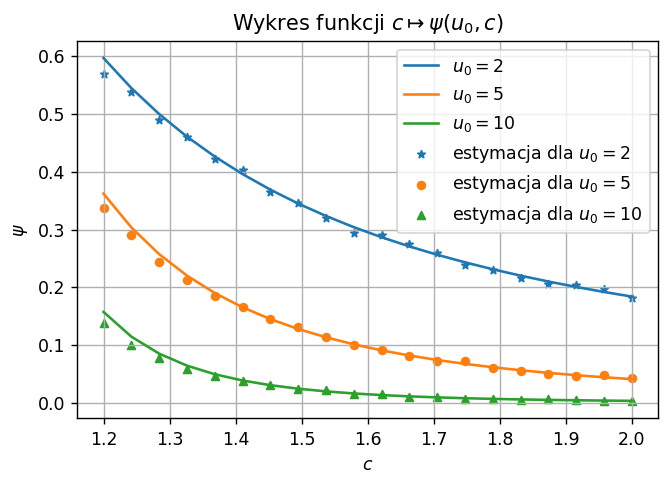

In [161]:
plt.plot(c_list, psi_list_2_1, label='$u_0 = 2$')
plt.plot(c_list, psi_list_2_2, label='$u_0 = 5$')
plt.plot(c_list, psi_list_2_3, label='$u_0 = 10$')
plt.scatter(c_list, estimate_list_2_1, label='estymacja dla $u_0 = 2$',marker='*', s=20)
plt.scatter(c_list, estimate_list_2_2, label='estymacja dla $u_0 = 5$', marker='o', s=20)
plt.scatter(c_list, estimate_list_2_3, label='estymacja dla $u_0 = 10$', marker='^', s=20)
plt.xlabel('$c$')
plt.ylabel('$\psi$')
plt.legend()
plt.title('Wykres funkcji $c \mapsto \psi(u_0, c)$')
plt.grid('True')
plt.show()

Na wykresie przedstawiono 3 trajektorie funkcji $c \mapsto \psi(u_0, c)$ dla ustalonych $u_0$. Wartości wyestymowane zaznaczono punktowo. Z przeprowadzonej symulacji wynika, że otrzymane wartości $\psi$ są bliskie z wartościami otrzymanymi ze wzoru Pollaczka-Chinczyna.

In [162]:
print(np.mean(np.abs(np.array(psi_list_2_1) - np.array(estimate_list_2_1))))
print(np.mean(np.abs(np.array(psi_list_2_2) - np.array(estimate_list_2_2))))
print(np.mean(np.abs(np.array(psi_list_2_3) - np.array(estimate_list_2_3))))

0.00535019984659736
0.0044686034773039705
0.0030847578644054886


Obliczono średni błąd bezwzględny (MAE) między wartościami wyestymowanymi, a wartościami dokładanymi. Wyniki zaprezentowano w poniższej tabeli.

$$
\begin{aligned}
& \\
&\begin{array}{ccc}
\hline \hline u_0 & \text { MAE }  \\
\hline 2 & 0,0054 \\
5 & 0,0044 \\
10 & 0,0031  \\
\hline
\end{array}
\end{aligned}
$$

### Dla funkcji $c = c(u,\psi)$

In [165]:
u_list = np.linspace(1.2, 10, 10)
c_list_3_1 = [c(u, 0.05, 1, 1) for u in u_list]
c_list_3_2 = [c(u, 0.1, 1, 1) for u in u_list]
c_list_3_3 = [c(u, 0.2, 1, 1) for u in u_list]
estimate_list_3_1 = [required_payments_value_simulation(10**4, 50,  u, 0.05, 1, 1) for u in u_list]
estimate_list_3_2 = [required_payments_value_simulation(10**4, 50,  u, 0.1, 1, 1) for u in u_list]
estimate_list_3_3 = [required_payments_value_simulation(10**4, 50,  u, 0.2, 1, 1) for u in u_list]

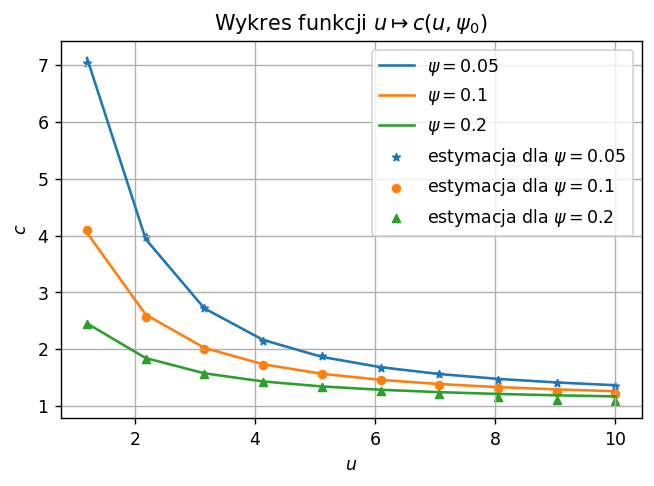

In [166]:
plt.plot(u_list, np.real(c_list_3_1), label='$\psi = 0.05$')
plt.plot(u_list, np.real(c_list_3_2), label='$\psi = 0.1$')
plt.plot(u_list, np.real(c_list_3_3), label='$\psi = 0.2$')
plt.scatter(u_list, estimate_list_3_1, label='estymacja dla $\psi = 0.05$',marker='*', s=20)
plt.scatter(u_list, estimate_list_3_2, label='estymacja dla $\psi = 0.1$', marker='o', s=20)
plt.scatter(u_list, estimate_list_3_3, label='estymacja dla $\psi = 0.2$', marker='^', s=20)
plt.xlabel('$u$')
plt.ylabel('$c$')
plt.legend()
plt.title('Wykres funkcji $u \mapsto c(u, \psi_0)$')
plt.grid('True')
plt.show()

Na wykresie przedstawiono 3 trajektorie funkcji $u \mapsto c(u, \psi_0)$ dla ustalonych $\psi_0$. Wartości wyestymowane zaznaczono punktowo. Z przeprowadzonej symulacji wynika, że otrzymane wartości $c$ są bliskie z wartościami otrzymanymi ze wzoru funkcji odwrotnej.

In [ ]:
print(np.mean(np.abs(np.real(c_list_3_1) - np.array(estimate_list_3_1))))
print(np.mean(np.abs(np.real(c_list_3_2) - np.array(estimate_list_3_2))))
print(np.mean(np.abs(np.real(c_list_3_3) - np.array(estimate_list_3_3))))

Obliczono średni błąd bezwzględny (MAE) między wartościami wyestymowanymi, a wartościami dokładanymi. Wyniki zaprezentowano w poniższej tabeli.

$$
\begin{aligned}
& \\
&\begin{array}{ccc}
\hline \hline \psi_0 & \text { MAE }  \\
\hline 0.05 & 0,0048 \\
0.1 & 0,0019 \\
0.2 & 0,0030  \\
\hline
\end{array}
\end{aligned}
$$

# Zadanie 6

C:\Users\Janek\AppData\Local\Temp\ipykernel_22412\2319334794.py:98: RuntimeWarning: divide by zero encountered in divide
  1 / (np.pi * np.sqrt(xs * (1 - xs))),


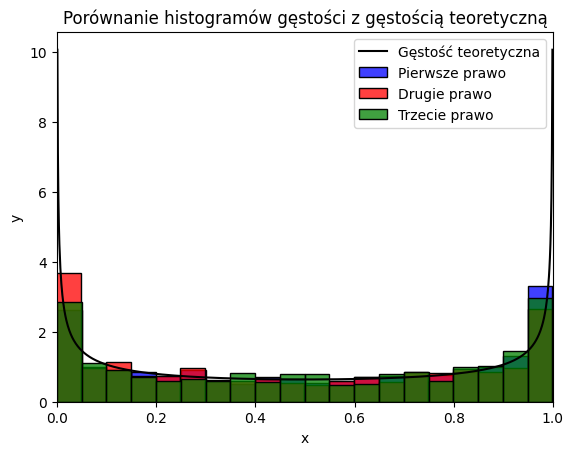

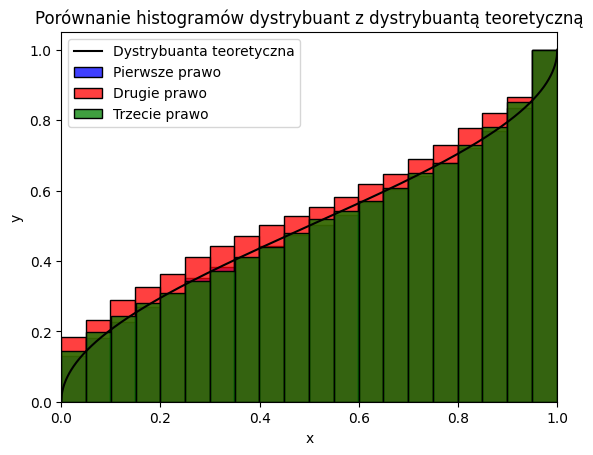

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def proces_wienera(size=1000):
    """Symulacja trajektorii procesu Wienera(ruchu Browna) na odcinku [0,1].

    Argumenty:
    T -- długość przedziału, na którym generowany jest proces(domyślnie 1)
    size -- ilość skoków trajektorii w ustalonym przedziale(domyślnie 1000)"""

    krok = 1 / size  # odstęp pomiędzy kolejnymi skokami
    lista_skoków = np.sqrt(krok) * np.random.randn(size)  # wartości kolejnych skoków

    trajektoria = np.zeros(size + 1)  # Inicjalizowanie trajektorii
    trajektoria[1:] = np.cumsum(lista_skoków)  # tworzenie trajektorii

    return trajektoria


def pierwsze_prawo(trajektoria, długość):
    """Sprawdzanie pierwszego prawa arcusa sinusa. Jeśli jest prawdziwe to funkcja zwróci zmienną losową z rozkładu arcusa sinusa.

    Argumenty:
    trajektoria -- trajektoria procesu Wienera jako lista punktów
    długość -- ilość elementów w liście punktów trajektorii
    """
    licznik = (
        0  # zliczanie punktów, dla których trajektoria przyjmuje wartości dodatnie
    )

    for iterator in range(0, długość):  # zliczanie wartości powyżej osi OX
        if trajektoria[iterator] > 0:
            licznik += 1

    return (
        licznik / długość
    )  # zwracanie długości czasu powyżej osi OX (ilość zliczonych elementów podzielona przez łączną ilość punktów z trajektorii)


def drugie_prawo(trajektoria, długość):
    """Sprawdzanie drugie prawa arcusa sinusa. Jeśli jest prawdziwe to funkcja zwróci zmienną losową z rozkładu arcusa sinusa.

    Argumenty:
    trajektoria -- trajektoria procesu Wienera jako lista punktów
    długość -- ilość elementów w liście punktów trajektorii
    """
    iterator = długość - 1  # iterator pętli poniżej (zmienna pomocnicza)
    while iterator >= 0:  # szukanie numeru indeksu ostatniego uderzenia w oś OX
        if trajektoria[iterator] <= 0 and trajektoria[iterator - 1] > 0:
            break
        else:
            iterator -= 1

    return (
        iterator / długość
    )  # zwracanie ostatniego momntu przebicia(iterator podzielony przez ilość elementów)


def trzecie_prawo(trajektoria, długość):
    """Sprawdzanie trzeciego prawa arcusa sinusa. Jeśli jest prawdziwe to funkcja zwróci zmienną losową z rozkładu arcusa sinusa.
    Argumenty:
    trajektoria -- trajektoria procesu Wienera jako lista punktów
    długość -- ilość elementów w liście punktów trajektorii
    """
    return (
        np.argmax(trajektoria) / długość
    )  # zwracanie momntu osiągnięcia maksymalnej wartości(indeks podzielony przez ilość elementów)


if __name__ == "__main__":
    """Właściwa część programu."""
    xs = np.linspace(
        0, 1, 1000
    )  # zakres argumentów gęstrości i dystrybuanty teoretycznej
    n = 1000  # deklaracja ilości prób Monte Carlo
    zmienne_1 = np.zeros(n)
    zmienne_2 = np.zeros(n)
    zmienne_3 = np.zeros(n)
    for i in range(0, n):  # sprawdzanie praw dla n trajektorii procesów
        proces = proces_wienera()
        zmienne_1[i] = pierwsze_prawo(proces, len(proces))
        zmienne_2[i] = drugie_prawo(proces, len(proces))
        zmienne_3[i] = trzecie_prawo(proces, len(proces))

    sns.histplot(
        zmienne_1, stat="density", color="blue", label="Pierwsze prawo", binwidth=0.05
    )  # rysowanie histogramów gęstości empirycznych oraz teoretycznej
    sns.histplot(
        zmienne_2, stat="density", color="red", label="Drugie prawo", binwidth=0.05
    )
    sns.histplot(
        zmienne_3, stat="density", color="green", label="Trzecie prawo", binwidth=0.05
    )
    plt.plot(
        xs,
        1 / (np.pi * np.sqrt(xs * (1 - xs))),
        color="black",
        label="Gęstość teoretyczna",
    )
    plt.title("Porównanie histogramów gęstości z gęstością teoretyczną")
    plt.xlim((0, 1))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    plt.close()

    sns.histplot(
        zmienne_1,
        stat="density",
        color="blue",
        label="Pierwsze prawo",
        cumulative=True,
        binwidth=0.05,
    )  # rysowanie histogramów dystrybuant empirycznych oraz teoretycznej
    sns.histplot(
        zmienne_2,
        stat="density",
        color="red",
        label="Drugie prawo",
        cumulative=True,
        binwidth=0.05,
    )
    sns.histplot(
        zmienne_3,
        stat="density",
        color="green",
        label="Trzecie prawo",
        cumulative=True,
        binwidth=0.05,
    )
    plt.plot(
        xs,
        2 * np.arcsin(np.sqrt(xs)) / np.pi,
        color="black",
        label="Dystrybuanta teoretyczna",
    )
    plt.title("Porównanie histogramów dystrybuant z dystrybuantą teoretyczną")
    plt.xlim((0, 1))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()


Na podstawie powyższych wykresów możena stwierdzić, że spełnione są przedstawione w poleceniu zadania prawa arcusa sinusa.